# Notes

Clean filtered data. Fields can easily be copied to top of analysis notebooks.


In [10]:
import pandas as pd
train_identity = pd.read_csv('Data/train_identity.csv',index_col='TransactionID')
train_transaction = pd.read_csv('Data/train_transaction.csv',index_col='TransactionID')
train_transaction = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)

In [10]:
train_identity = pd.read_csv('Data/train_identity.csv',index_col='TransactionID')
train_transaction = pd.read_csv('Data/train_transaction.csv',index_col='TransactionID')
train_transaction = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)

filter columns using threshold of maximum 20% NAs in column

In [11]:
threshold = 0.2
train_transaction_selection = pd.DataFrame()
for colName in train_transaction:
    naCountColumn = train_transaction[colName].isna().sum()/len(train_transaction)
    if (naCountColumn < threshold):
        train_transaction_selection[colName] = train_transaction[colName]
train_transaction = train_transaction_selection

In [37]:
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#train_transaction

In [13]:
from sklearn.preprocessing import LabelEncoder
cols = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain'
]
category_cols = cols
for col in cols:
    train_transaction[col].fillna("unknown").astype('category')
    train_transaction[col] = LabelEncoder().fit_transform(train_transaction[col].astype(str))

In [14]:
# Choose policy for filling NAs. Option 1 uses mode (many variables contain small integer, so mode was chosen instead of mean), Option 2 uses -999
# Option 1 (Default): mode 
for colName in train_transaction_selection:
    train_transaction_selection.loc[:, (colName)].fillna(train_transaction_selection[colName].mode().iloc[0], inplace = True)

# Option 2
#train_transaction.fillna(-999, inplace=True)

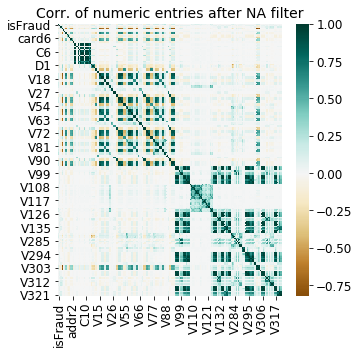

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
subset = train_transaction.sample(frac=0.99)
plt.figure(figsize=(5,5))
sns.heatmap(subset.corr(), cmap='BrBG', annot=False, center=0.0)
plt.title('Corr. of numeric entries after NA filter',fontsize=14)
#plt.show()
plt.savefig('correlationMatrix.png')

In [64]:
#scale data

#df = train_transaction
#train_transaction_normalized=(df-df.min())/(df.max()-df.min())

In [89]:
# columns = train_transaction.columns
# columns2 = train_transaction.columns
# arr = pd.DataFrame()

train_transaction.sample(frac=0.1).corr().iloc[:,0]
# for col in columns:
#     for col1 in columns:
#         if (train_transaction[col].corr(train_transaction[col1])>0.7):
#             arr["1"] = col
#             arr["2"] = col1
    

isFraud           1.000000
TransactionDT     0.011289
TransactionAmt    0.007129
ProductCD        -0.158561
card1             0.015189
card2             0.001651
card3             0.141743
card4            -0.003413
card5            -0.027985
card6            -0.089340
addr1             0.100101
addr2             0.114686
P_emaildomain    -0.030902
C1                0.019671
C2                0.026843
C3               -0.008166
C4                0.020747
C5               -0.032232
C6                0.011649
C7                0.014207
C8                0.019545
C9               -0.030917
C10               0.016102
C11               0.016571
C12               0.017521
C13              -0.018976
C14              -0.000207
D1               -0.064085
D10              -0.071698
D15              -0.074595
V12              -0.035872
V13              -0.031878
V14               0.003973
V15               0.157690
V16               0.156827
V17               0.165492
V18               0.166800
V

In [65]:
# train_data = train_transaction_normalized[["isFraud","V70","C7","C14"]].sample(frac=1)
# y = train_data["isFraud"]
# x = train_data[["V70","C7","C14"]]

In [67]:
train_data = train_transaction_normalized.drop("D15",1) #negative values for D15 are not allowed in Multinomial Naive Bayes
y = train_data["isFraud"]
x = train_data.drop("isFraud", 1)

In [68]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x, y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [69]:
pred = classifier.predict(x)

Text(91.68, 0.5, 'Predicted')

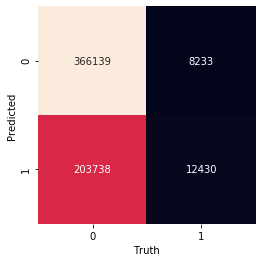

In [41]:
from sklearn.metrics import confusion_matrix
import numpy as np
mat = confusion_matrix(pred, y)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

GaussianNB
****Results****
Accuracy: 35.2565%
MultinomialNB
****Results****
Accuracy: 89.0162%
BernoulliNB
****Results****
Accuracy: 82.2801%
ComplementNB
****Results****
Accuracy: 85.3019%


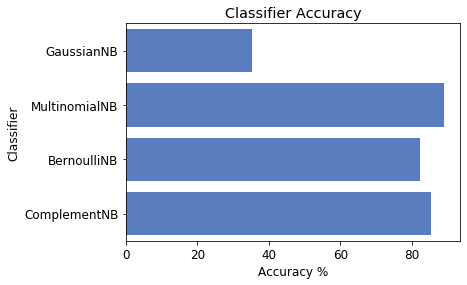

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import accuracy_score, log_loss
X_train = x
y_train = y

classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
 

X_test = x
y_test = y

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

In [ ]:
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]

GaussianNB
****Results****
Accuracy: 35.2565%
MultinomialNB
****Results****
Accuracy: 89.0162%
BernoulliNB
****Results****
Accuracy: 82.2801%
ComplementNB
****Results****
Accuracy: 85.3019%
CategoricalNB
****Results****
Accuracy: 88.0530%


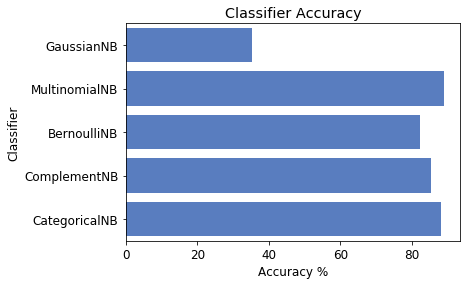

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.metrics import accuracy_score, log_loss
X_train = x
y_train = y

# alpha=0.5, binarize=0.0, fit_prior=True, class_prior=None

classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),
    CategoricalNB(),
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
 

X_test = x
y_test = y

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

GaussianNB
****Results****
Accuracy: 4.9582%
MultinomialNB
****Results****
Accuracy: 64.1067%
BernoulliNB
****Results****
Accuracy: 82.4024%
ComplementNB
****Results****
Accuracy: 63.3576%
CategoricalNB
****Results****
Accuracy: 87.5168%


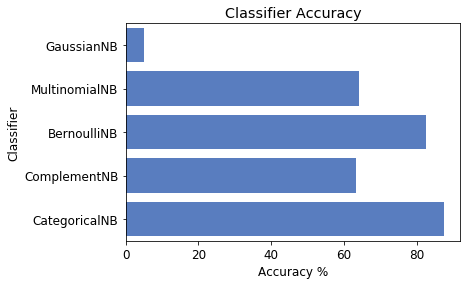

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB

from sklearn.metrics import accuracy_score, log_loss
X_train = x
y_train = y

# alpha=0.5, binarize=0.0, fit_prior=True, class_prior=None

classifiers = [
    GaussianNB(),
    MultinomialNB(alpha=0.1),
    BernoulliNB(alpha=0.1),
    ComplementNB(alpha=0.1),
    CategoricalNB(alpha=0.1),
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
 

X_test = x
y_test = y

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()